In [1]:
import pandas as pd
import networkx as nx
import random
import colorlover as cl
from IPython.display import HTML
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

#Natural Language Processing Packages
import re #RegEx
import nltk

## Download Resources
#nltk.download("vader_lexicon")
nltk.download("stopwords")
#nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

#from nltk.sentiment import SentimentAnalyzer
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
#from nltk.tag import PerceptronTagger
#from nltk.data import find


[nltk_data] Downloading package stopwords to C:\Windows\ServiceProfile
[nltk_data]     s\LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip', quoting = 3)
print("Num of rows:", df.shape[0])
df.head()

Num of rows: 3448418


,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


In [3]:
lakersTag = df[df["tweet"].str.lower().str.contains("#lakers", na=False)].copy()

In [4]:
from collections import Counter

'''
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)
tophashTags = hashTagsCounter.most_common(100)
print(tophashTags)
'''
#lakersTag = df[df["tweet"].str.lower().str.contains("#lakers", na=False)].copy()

#print("Num of rows:", lakersTag.shape[0])

In [5]:
#'^http?:\/\/.\S*'
   # tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet)

lakersTag = df[df["tweet"].str.lower().str.contains("#lakers", na=False)].copy()
lakersTag['tweet'].replace(['http\S*'],[''],inplace=True,regex=True)

print("Num of rows:", lakersTag.shape[0])

Num of rows: 459


In [6]:
#tweetCheck = lakersTag[lakersTag['tweet'].str.contains('http',na=False)].copy()
#tweetCheck.head(100)
lakersTag.head()

,date,user,tweet
39099,2009-06-11 17:57:37,lakers_news,BlueAndGold- #Lakers Lakers/Magic Game 4 Previ...
56635,2009-06-11 18:21:29,thelakersnation,#lakers Hollinger’s Grteatest Franchise Rankin...
66316,2009-06-11 18:40:08,ocregsports,#Lakers What did the Lakers do with their day ...
103765,2009-06-11 19:42:01,matthewgc,"Can't wait for the game tonight, Go #Lakers GO..."
105037,2009-06-11 19:43:24,lamase,Kareem says Dwight Howard of #Magic is predic...


In [7]:
#lakersTag['user'].unique().size

297

In [8]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:!'\";""").lower().replace(')','').replace('(','') for word in txt.split()]
        #
        allNames = [word.strip("@") for word in allWords if word.startswith("@") and word !='@']
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [9]:
addMentionedColumn(lakersTag)

In [10]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                if user =='' or mentionedUser=='':
                    print(user)
                g.add_edge(user, mentionedUser, {'numberMentions': 1})
                
    
    return g

In [11]:
lakersGraph = mentionGraph(lakersTag)

### Q2(a)

In [12]:
#Q2(a)
print("# nodes:", len(lakersGraph.nodes()))
print("# edges:", len(lakersGraph.edges()))

# nodes: 263
# edges: 198


### Q2(b)

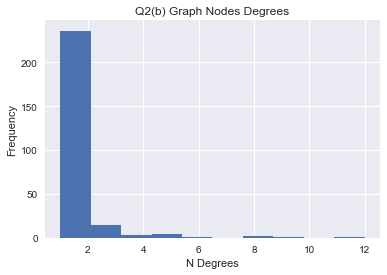

In [13]:
#Q2(b)
nodesDegree =[]
for node in lakersGraph.nodes():
    nodesDegree.append(nx.degree(lakersGraph,node))

#print(nodesDegree)
plt.hist(nodesDegree)
plt.title("Q2(b) Graph Nodes Degrees")
plt.xlabel("N Degrees")
plt.ylabel("Frequency")
fig = plt.gcf()

### Q2(c)

In [15]:
edgeWeight=[]
for node1, node2 in lakersGraph.edges():
    edgeWeight.append(lakersGraph[node1][node2]['numberMentions'])
edgeWeight.sort(reverse=True)
#print(nodesDegree)
maxnum = 5
for number in edgeWeight[:5]:
    
    if maxnum == 0:
        break
    for node1, node2 in lakersGraph.edges():
        for num in range(0,maxnum):
            if number == lakersGraph[node1][node2]['numberMentions']:
                print(number)
                maxnum = maxnum - 1
                print("@%s <---> @%s" % (node1, node2))
                break

        


7
@ohbribri <---> @ohbribri
5
@ohbribri <---> @alicejam
3
@jtothelo <---> @lakers
2
@lakers_news <---> @denstyls
2
@mrpaulevans <---> @lakers


In [17]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [18]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph,"pos", posDict)

In [19]:
addRandomPositions(lakersGraph)

In [20]:
import colorlover as cl
from IPython.display import HTML
#HTML(cl.to_html( cl.scales['7'] ))

In [21]:
# map purd color scale to 300 cells
purd = cl.scales['7']['qual']['Set1']
purd300 = cl.interp(purd, 700)
#HTML(cl.to_html(purd300))

In [22]:
def getTopk(df, k=50):
    tweets= df['tweet'].as_matrix()

    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    #stop.add('http')
    #stop.add()
    # Top-k frequent terms
    from collections import Counter
    counter = Counter()
    
    for tweet in tweets:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
   
    return topk

In [23]:
def getTopkUser(node, df):
    df2 = df.loc[df['user']==node]
    topk = getTopk(df2, 3)
    return topk


In [24]:
def plotNetworkSizeColorTopWords(graph, df):
    closenessCentr = nx.closeness_centrality(graph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text = "Numer of Mentions: %d" % edgeWidth,
                hoverinfo='text',
                mode='lines', 
                line=Line(width=edgeWidth*2 ,color=purd300[(100*edgeWidth)-10])) #width=edgeWidth*2 ,color=purd300[(100*edgeWidth)-10])
        scatters.append(s)

    

    for node in graph.nodes():
        topk = getTopkUser(node, df)
        nodeCentr = closenessCentr[node]
        nodeColor = int(699*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Top 3 words: %s \n N Degrees %s" % (node, topk,nx.degree(graph,node)),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*5,         
                    line=dict(width=2)))
        scatters.append(s)
       
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [25]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, "pos", posDict)

### Q2(d) , Q3 (b)

In [26]:
#Q2(d) - Edge colour reflects weight (orange is heaviest)
#Q3 (b) - Hover info of nodes: 3 common words

lakersGraphSpring = lakersGraph.copy()
applyLayout(lakersGraphSpring, nx.spring_layout)
plotNetworkSizeColorTopWords(lakersGraphSpring, lakersTag)

### Q3(a)

In [27]:
print(getTopk(lakersTag))
#Main Themes: Basketball final game of lakers vs orlando magic with mention of players from both teams such as kobe, fisher etc

[('lakers', 640), ('nba', 177), ('magic', 156), ('game', 100), ('kobe', 70), ('finals', 54), ('fisher', 33), ('let', 28), ('win', 28), ('orlando', 23), ('golakers', 23), ('jackson', 22), ('derek', 20), ('howard', 20), ('times', 20), ('get', 20), ('tonight', 18), ('one', 17), ('ilist', 17), ('fans', 16), ('gold', 16), ('24kt', 16), ('like', 15), ('think', 15), ('twitter', 14), ('going', 14), ('phil', 14), ('shot', 14), ('love', 14), ('bryant', 13), ('lol', 13), ('photo', 13), ('mint', 13), ('coin', 13), ('fish', 13), ('good', 13), ('series', 12), ('foul', 12), ('pietrus', 12), ('lakersnation', 12), ('championship', 12), ('need', 12), ('ftw', 12), ('play', 11), ('refs', 11), ('say', 11), ('2009', 11), ('take', 11), ('lead', 11), ('time', 11)]


In [28]:
#lakersTag.to_csv('lakers.csv', encoding='utf-8')

### Q4(a)

In [29]:
#Two centrality measures selected are Betweenness and Node Degree
def centralityMeasure(graph, measure=1):
    if measure == 1:
        return nx.betweenness_centrality(graph)
#    elif measure == 2:
#       return nx.pagerank(graph)
    elif measure == 3:
        return nx.degree(graph)

In [34]:
def plotCentrality(graph, df, measure=1):
    closenessCentr = centralityMeasure(graph, measure) #Calculates centrality of each node
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text = "Numer of Mentions: %d" % edgeWidth,
                hoverinfo='text',
                mode='lines', 
                line=Line(width=edgeWidth ,color=purd300[(100*edgeWidth)-10]))
        scatters.append(s)

    

    for node in graph.nodes():
        topk = getTopkUser(node, df)
        nodeCentr = closenessCentr[node]
        #closeness = nodeCentr
        nodeCentr = (nodeCentr-minCentr)/(maxCentr-minCentr)
        nodeColor = int(699*nodeCentr)
                        #(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']

        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Top 3 words: %s \n N Degrees %s \n Centrality Score: %s"  % (node, topk,nx.degree(graph,node),nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=100*nodeCentr,        
                    line=dict(width=2)))
        scatters.append(s)
       
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

### Q4(b)

In [37]:
#Betweenness centrality visualization
plotCentrality(lakersGraphSpring, lakersTag,1)

In [36]:
#Node Degree visualization
plotCentrality(lakersGraphSpring, lakersTag,3)

### Q4(c)

(c) Top 3 Key Players are:
Betweenness - @jtothelo, @lakers, @ohbribri
N Degrees - @ohbribri, @jtothelo, @lakers

1. The results are similar for the top 3 key players using both centrality measures although with different rankings. Due to sparse data the users that are connected the most are also in between most of the tweets that were mentioned
2. Betweenness - Lakers are the topic of this hashtag and their official account makes sense to be the central node amongst all